This notebook will be used to test the sensitivity of tidal ellipses from the model output based on data series variations such as length, frequency and seasonality.

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os
from glob import glob
import pandas as pd
from matplotlib.patches import Ellipse

from salishsea_tools import(viz_tools, tidetools, nc_tools)
from salishsea_tools.nowcast import (analyze, figures, research_VENUS)
from IPython.display import Image
import datetime

%matplotlib inline

##1. Frequency
The model has been giving an ouput for tracers and velocities every 15 minutes since Myy 9th 2015. This section will compare the tidal ellipses of the hourly data and the quarter-hourly data between the 9th and 31st of May 2015.

The tidal ellipse paramaters have been calculated and entered into a CSV in the [SaveTidalParameter](www.nbviewer.ipython.org/urls/bitbucket.org/salishsea/analysis/raw/tip/Muriel/SaveTidalParameters.ipynb) notebook

In [83]:
to=datetime.datetime(2015,5,9)
to2=datetime.datetime(2014,11,24)
tf=datetime.datetime(2015,5,30)
tf2 = datetime.datetime(2015, 6, 8)

t_o = to.strftime('%d%b%y').lower()
t_o2 = to2.strftime('%d%b%y').lower()
t_f = tf.strftime('%d%b%y').lower()
t_f2 = tf2.strftime('%d%b%y').lower()

runname1 = '{}_{}_{}_Central'.format(t_o, t_f, '15')
runname2 = '{}_{}_{}_Central'.format(t_o, t_f, 'h')
runname3 = '{}_{}_{}_Central'.format(t_o2, t_f2, 'h')
cols=np.arange(0,7)

df1 = pd.read_csv(runname1+'.csv', usecols=cols) 
df2 = pd.read_csv(runname2+'.csv', usecols=cols)
df3 = pd.read_csv(runname3+'.csv', usecols=cols)

qh_c = df1.as_matrix()
h_c = df2.as_matrix()
hlong_c = df3.as_matrix()

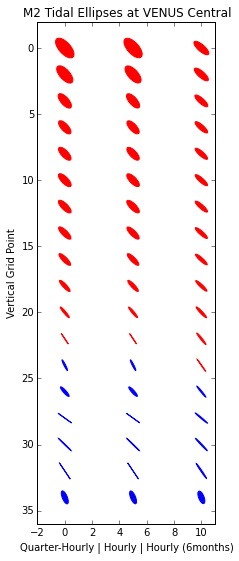

In [90]:
fig = plt.figure(figsize=(7,9))
ax = fig.add_subplot(121)
scale = 7
interval = 2

for dep in np.arange(0,37,interval):
    if qh_c[dep,2] > 0:
        thec = 'b'
    else:
        thec = 'r'
    ells = Ellipse(xy=(0,dep), width=scale*qh_c[dep,1], 
                        height=scale*qh_c[dep,2], angle=-qh_c[dep,3],
                        color=thec)
    ax.add_artist(ells)
    ells.set_facecolor(thec)
    
for dep in np.arange(0,40,interval):
    if h_c[dep,2] > 0:
        thec = 'b'
    else:
        thec = 'r'
    ells = Ellipse(xy=(5,dep), width=scale*h_c[dep,1], 
                        height=scale*h_c[dep,2], angle=-h_c[dep,3],
                        color=thec)
    ax.add_artist(ells)
    ells.set_facecolor(thec)
    
for dep in np.arange(0,40,interval):
    if hlong_c[dep,2] > 0:
        thec = 'b'
    else:
        thec = 'r'
    ells = Ellipse(xy=(10,dep), width=scale*hlong_c[dep,1], 
                        height=scale*hlong_c[dep,2], angle=-hlong_c[dep,3],
                        color=thec)
    ax.add_artist(ells)
    ells.set_facecolor(thec)
ax.set_ylim(-2,36)
ax.invert_yaxis()
ax.set_xlim(-2,11)
ax.set_title('M2 Tidal Ellipses at VENUS Central')
ax.set_ylabel('Vertical Grid Point')
ax.set_xlabel('Quarter-Hourly | Hourly | Hourly (6months)')

In [95]:
print "Central                15 Min                           Hourly                        Hourly (6 months)"
print "Depth    Major-Axis  Minor-Axis  Angle |  Major-Axis  Minor-Axis  Angle   |  Major-Axis  Minor-Axis  Angle "
print " (m)        (m/s)      (m/s)     (deg.    (m/s)       (m/s)      (deg.        (m/s)       (m/s)      (deg."
print "                                 ccw E)                          ccw E)                               ccw E)"
for i in np.arange(0,39,interval):
    if qh_c[i,1] > 0 :  
        print '{0:5.1f}      {1:.2f}        {2:.2f}       {3:.0f}      {4:.2f}       {5:.2f}       {6:.0f}      {7:.2f}       {8:.2f}       {9:.0f}'.format(qh_c[i,0], 
            qh_c[i,1], qh_c[i,2], qh_c[i,3], h_c[i,1], h_c[i,2],  h_c[i,3], hlong_c[i,1], hlong_c[i,2],  hlong_c[i,3])


Central                15 Min                           Hourly                        Hourly (6 months)
Depth    Major-Axis  Minor-Axis  Angle |  Major-Axis  Minor-Axis  Angle   |  Major-Axis  Minor-Axis  Angle 
 (m)        (m/s)      (m/s)     (deg.    (m/s)       (m/s)      (deg.        (m/s)       (m/s)      (deg.
                                 ccw E)                          ccw E)                               ccw E)
  0.5      0.26        -0.12       130      0.26       -0.12       130      0.20       -0.07       137
  2.5      0.23        -0.11       131      0.23       -0.10       131      0.19       -0.07       137
  4.5      0.19        -0.08       130      0.19       -0.08       130      0.18       -0.06       137
  6.5      0.18        -0.07       131      0.18       -0.07       131      0.17       -0.05       137
  8.5      0.18        -0.07       132      0.18       -0.07       132      0.17       -0.05       137
 10.5      0.18        -0.07       133      0.18       -0

The length makes much more of a difference than the frequency. Wether or not the high frequency over a longer time period is benefitial we do not know yet.